### Assignment Using R
These two weeks we are going to be focused on tree maps, area charts, and stacked area charts and using various tools to create these visualizations. Since the course is structured in 2-week blocks, every 2 weeks are going to be focused on a different visualization type that you create in various tools. This is to get you familiar with the pros/cons of Python, R, Tableau, and PowerBI – all tools you are going to run into in the real world, but that all have their own set of pros/cons. The book will cover one way to create a visualization, but we all know we have many tools at our disposal, so throughout these exercises you will be challenged to learn a variety of ways. Follow the recommendations and suggestions from your book on the design and use videos and other sources to find various ways to build the same visualizations.

Sample Datasets can be found here for everything I am going to ask you to do – but you don’t have to use this data, you can use whatever data you want if you want to try learning on something else.

Sample Datasets (click on the Downloads tab.)

You may also download them directly from this link:

Exercise 3.2 Datasets (click the link to download a folder containing the datasets.)

You need to submit:

1 tree map, 1 area chart and 1 stacked area chart using Tableau or PowerBI

1 tree map, 1 area chart and 1 stacked area chart using Python

1 tree map, 1 area chart and 1 stacked area chart using R



In [1]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            

In [3]:
# Loading required packages
library(magrittr)
library(readxl)
library(ggplot2)
library(dplyr)
library(pastecs)

# Set filepaths
file_expenditures = 'data/expenditures.txt'
file_unemployement = 'data/unemployement-rate-1948-2010.csv'

# Importing data to be used for visualization
raw_expenditures =  read.table(paste(file_expenditures,sep='/'), header = TRUE, sep = '\t', dec = '.', fill = TRUE)

raw_unemployement = read.csv2(paste(file_unemployement,sep='/'), sep=',', stringsAsFactors = FALSE) %>% 
    dplyr::mutate(Value = as.numeric(Value)) %>% 
    as.data.frame()
options(warn=-1)

In [4]:
# Display Head for Expenditures
head(raw_expenditures)

,year,category,expenditure,sex
,<int>,<chr>,<int>,<int>
1,2008,Food,6443,1
2,2008,Alcoholic Beverages,444,1
3,2008,Housing,17109,1
4,2008,Apparel,1801,1
5,2008,Transportation,8604,1
6,2008,Healthcare,2976,1


In [5]:
# Display Head for Unemployment
head(raw_unemployement)

,Series.id,Year,Period,Value
,<chr>,<int>,<chr>,<dbl>
1,LNS14000000,1948,M01,3.4
2,LNS14000000,1948,M02,3.8
3,LNS14000000,1948,M03,4.0
4,LNS14000000,1948,M04,3.9
5,LNS14000000,1948,M05,3.5
6,LNS14000000,1948,M06,3.6


### Treemap
#### Expenditure data
For the treemap, Lets see how much each category has costed

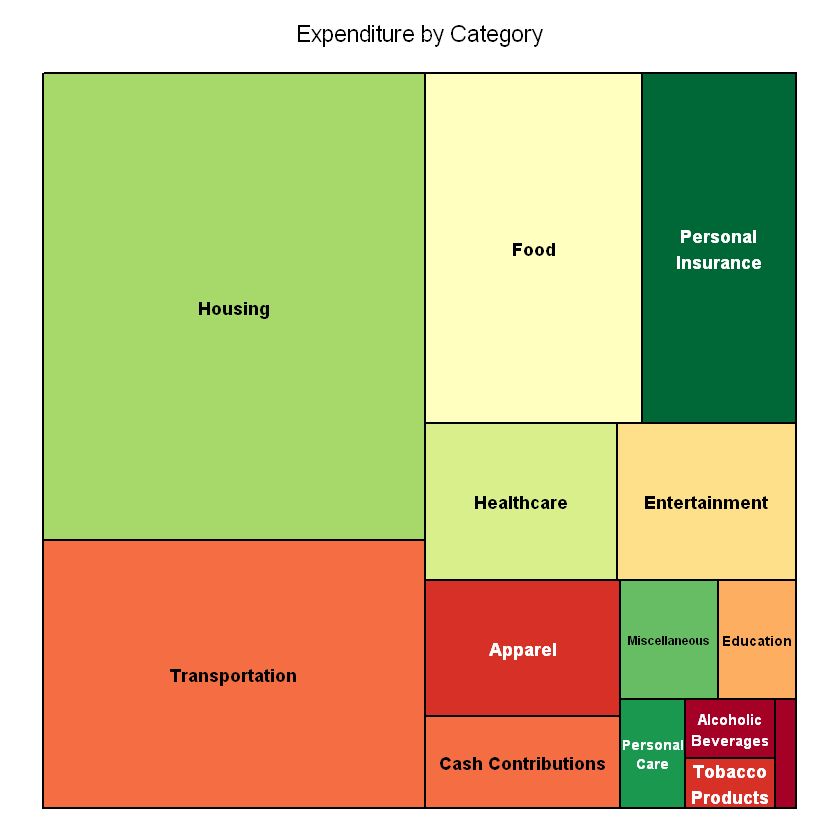

In [6]:
# Setting the chart size

treemap::treemap(raw_expenditures,index = c('category'),
                 vSize = 'expenditure',
                 title = 'Expenditure by Category', 
                 palette = 'RdYlGn')

### Area Chart
#### Unemployment data
For this graph, I would like to see the average value over the years, from the unemployment dataset.

In [7]:
avg_unemployement = raw_unemployement %>%
    dplyr::group_by(Year) %>%
    dplyr::summarize('Average Value' = mean(Value))

head(avg_unemployement)

Year,Average Value
<int>,<dbl>
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
1953,2.925000


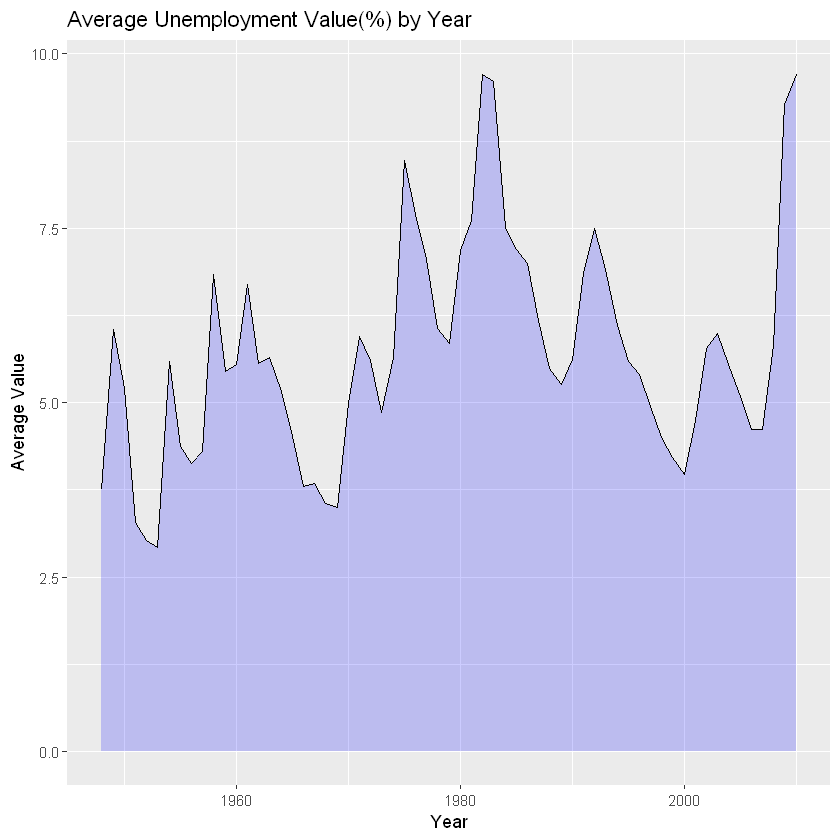

In [11]:
ggplot2::ggplot(avg_unemployement, ggplot2::aes(x=Year , y=`Average Value`)) +
ggplot2::geom_area( fill='blue', alpha=.2) +
ggplot2::geom_line() +
ggplot2::ggtitle('Average Unemployment Value(%) by Year')

### Stacked Area Chart
#### Expenditure data
For this graph, I would like to see what is the trend of the expenditure of each category over the years.

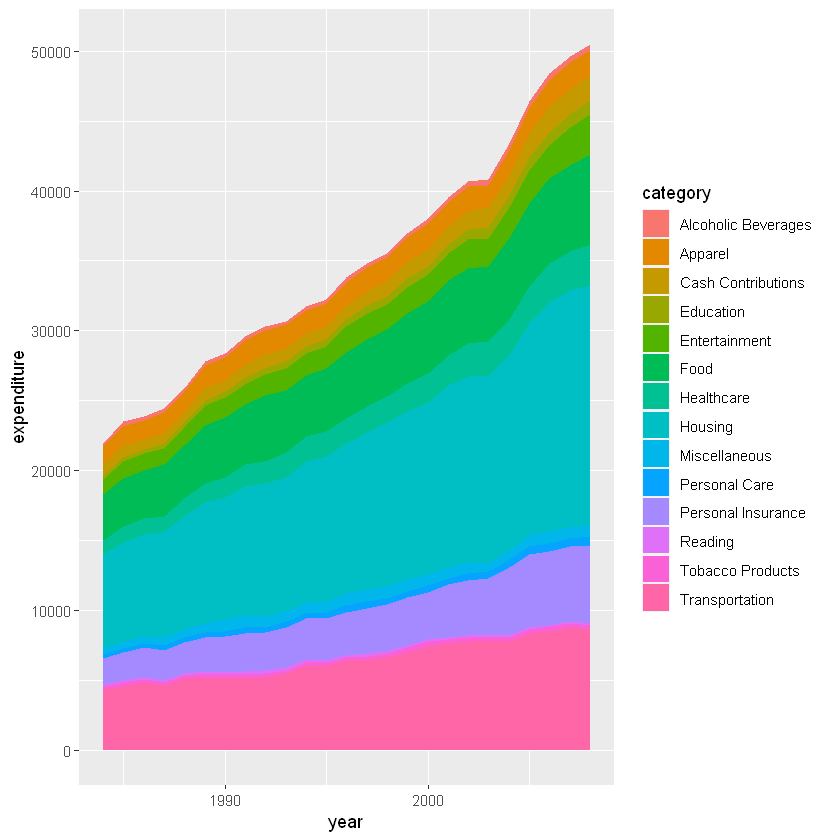

In [10]:
ggplot2::ggplot(raw_expenditures, ggplot2::aes(x=year, y=expenditure, fill=category)) + 
  ggplot2::geom_area()

**End of Code**